In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go

from google.colab import drive
drive.mount('/content/drive')

# Akses file dari Google Drive
file_path = '/content/sample_data/online_shoppers_intention.csv'
df = pd.read_csv(file_path)

# Cek data
df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


Data Visualisasi

<Axes: xlabel='Month'>

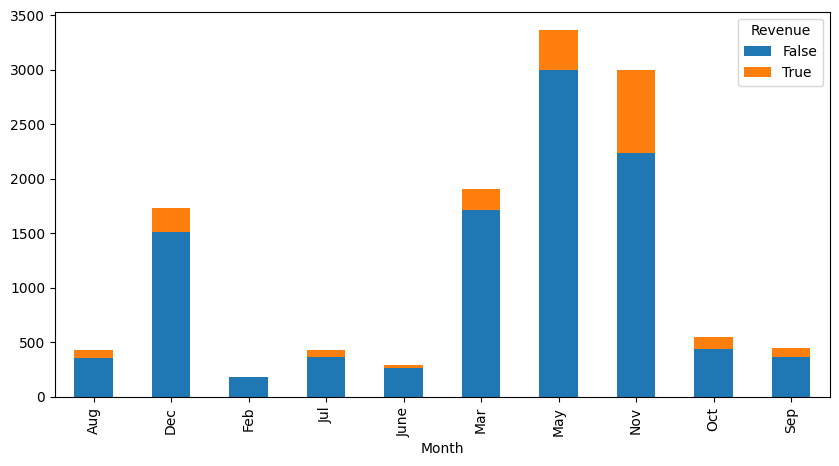

In [ ]:
df.groupby('Month')['Revenue'].value_counts().unstack('Revenue').plot(kind='bar', stacked=True, figsize=(10, 5))

Grafik ini akan menunjukkan jumlah kemunculan nilai 'Revenue' yang berbeda-beda untuk setiap bulan. Setiap batang mewakili satu bulan, dan bagian dari batang yang ditumpuk menunjukkan jumlah kemunculan masing-masing nilai 'Revenue' dalam bulan tersebut. Diagram batang bertumpuk memudahkan untuk melihat distribusi nilai 'Revenue' di setiap bulan secara visual.

<Axes: xlabel='Weekend'>

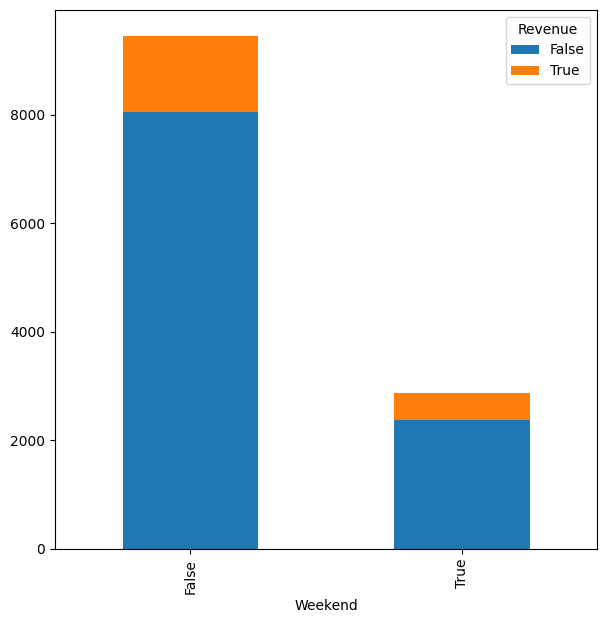

In [ ]:
df.groupby('Weekend')['Revenue'].value_counts().unstack('Revenue').plot(kind='bar', stacked=True, figsize=(7, 7))

<Axes: ylabel='count'>

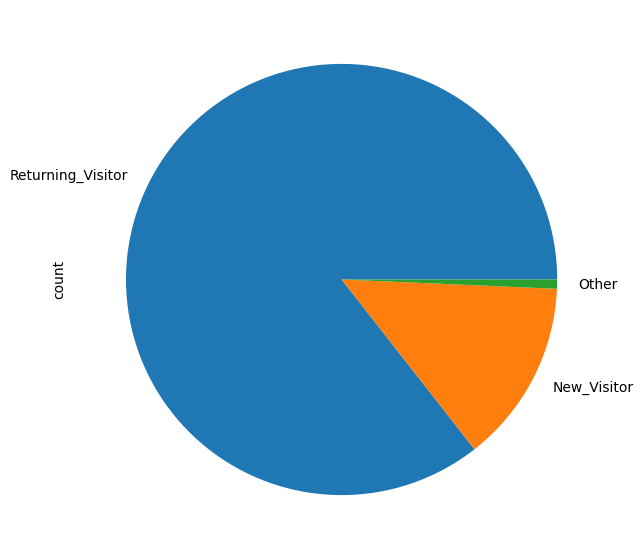

In [ ]:
df['VisitorType'].value_counts().plot.pie(y='VisitorType', figsize=(7, 7))

Kode ini akan menampilkan pie chart yang menunjukkan persentase berbagai jenis pengunjung (VisitorType) berdasarkan jumlah kemunculannya dalam dataset.

<Axes: >

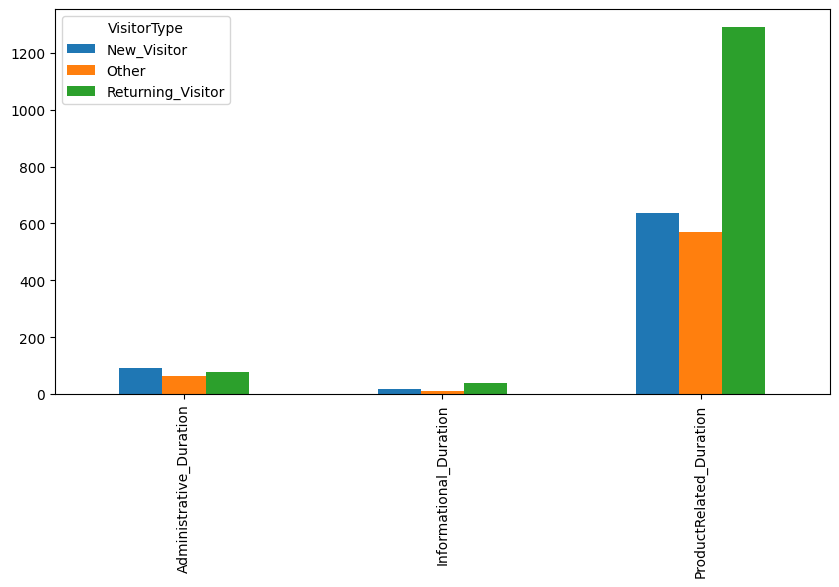

In [ ]:
df_pvt=df[['Administrative_Duration','Informational_Duration','ProductRelated_Duration','VisitorType']]
pd.pivot_table(df_pvt, values=['Administrative_Duration','Informational_Duration','ProductRelated_Duration'],columns=['VisitorType'], aggfunc='mean').plot(kind='bar', figsize=(10, 5))

Hasil dari kode ini adalah grafik batang yang menunjukkan rata-rata durasi dari Administrative_Duration, Informational_Duration, dan ProductRelated_Duration untuk masing-masing tipe pengunjung (VisitorType). Ini memberikan wawasan tentang bagaimana pengunjung menghabiskan waktu mereka di situs web berdasarkan status mereka (baru atau kembali).

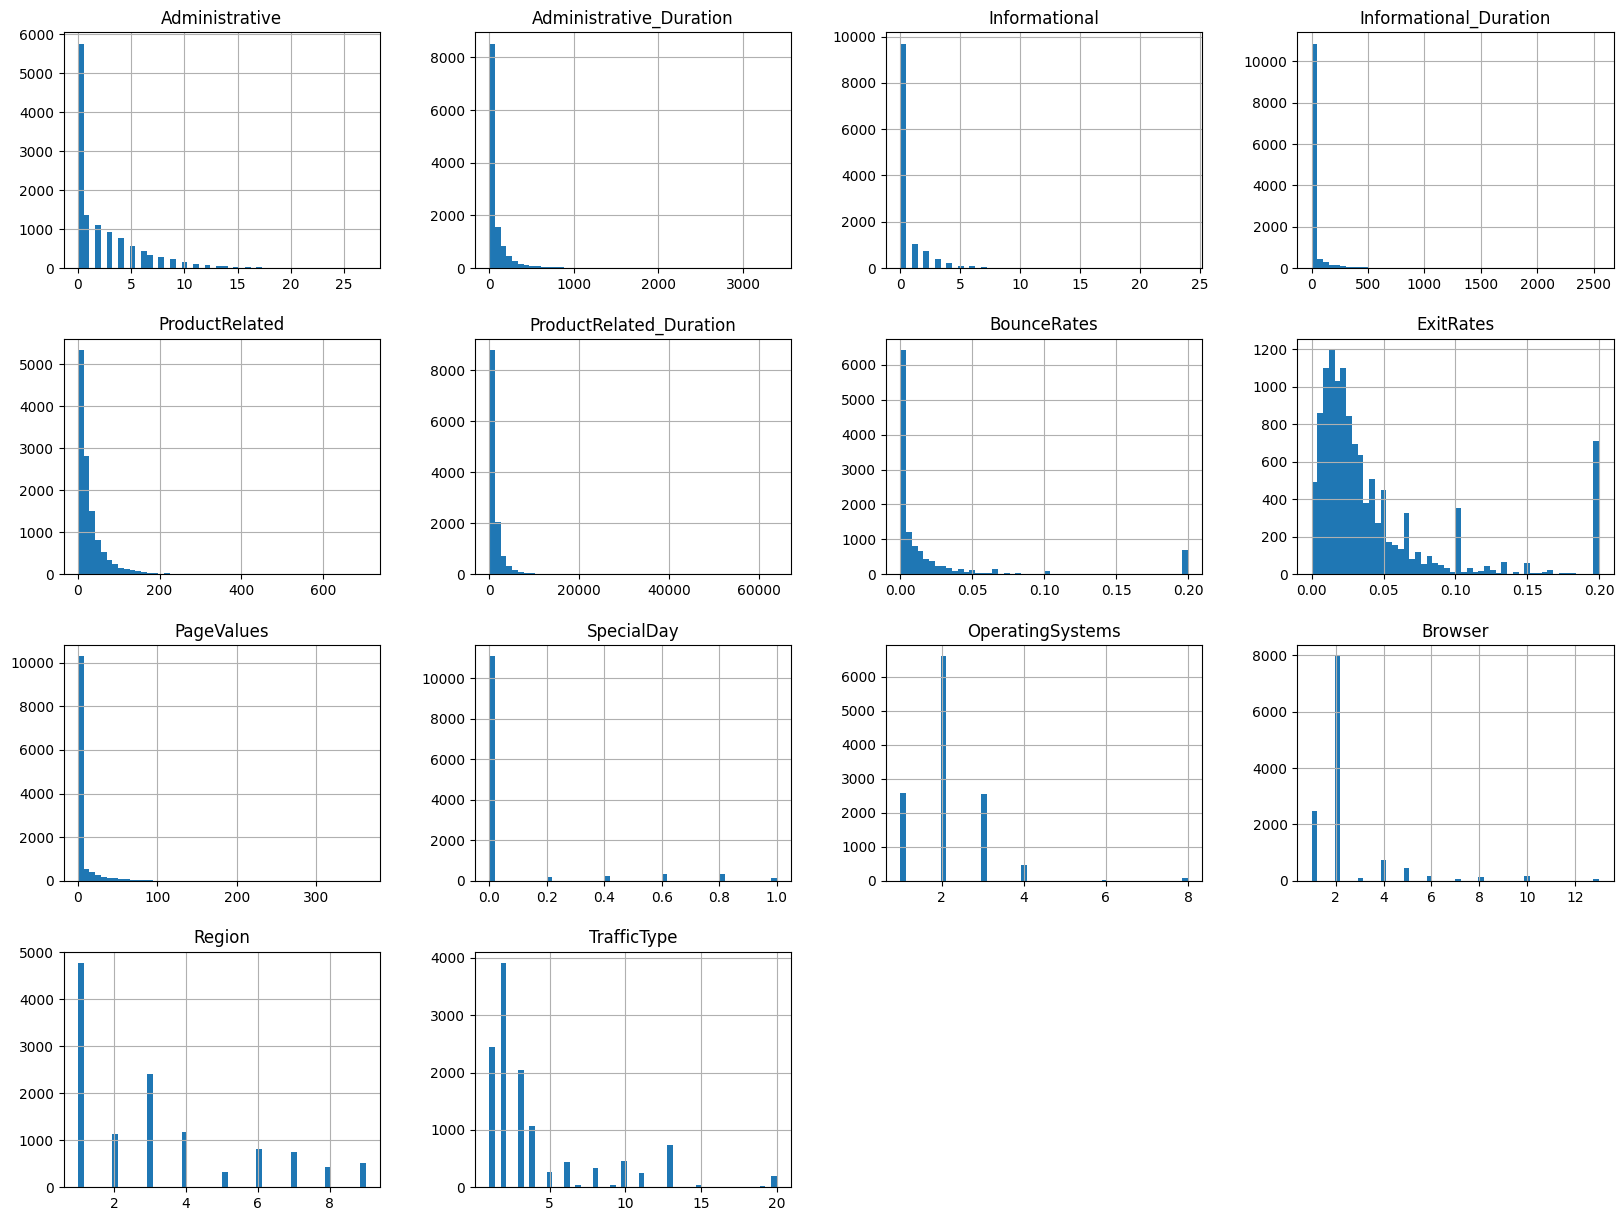

In [ ]:
df.hist(bins=50, figsize=(20,15))
plt.show()

Hasil dari kode ini adalah beberapa histogram yang masing-masing menunjukkan distribusi dari kolom-kolom numerik dalam dataframe. Setiap histogram memberikan wawasan tentang karakteristik data, seperti:

Rentang nilai: Berapa banyak nilai yang terdapat dalam rentang tertentu.
Frekuensi: Seberapa sering nilai tertentu muncul dalam dataset.
Distribusi: Pola distribusi data (misalnya, normal, skewed, dll.).
Dengan memvisualisasikan semua kolom numerik, kita dapat dengan cepat memahami sifat data, mendeteksi outlier, dan mengidentifikasi pola dalam dataset.

Data Cleaning and Standardization

<Axes: >

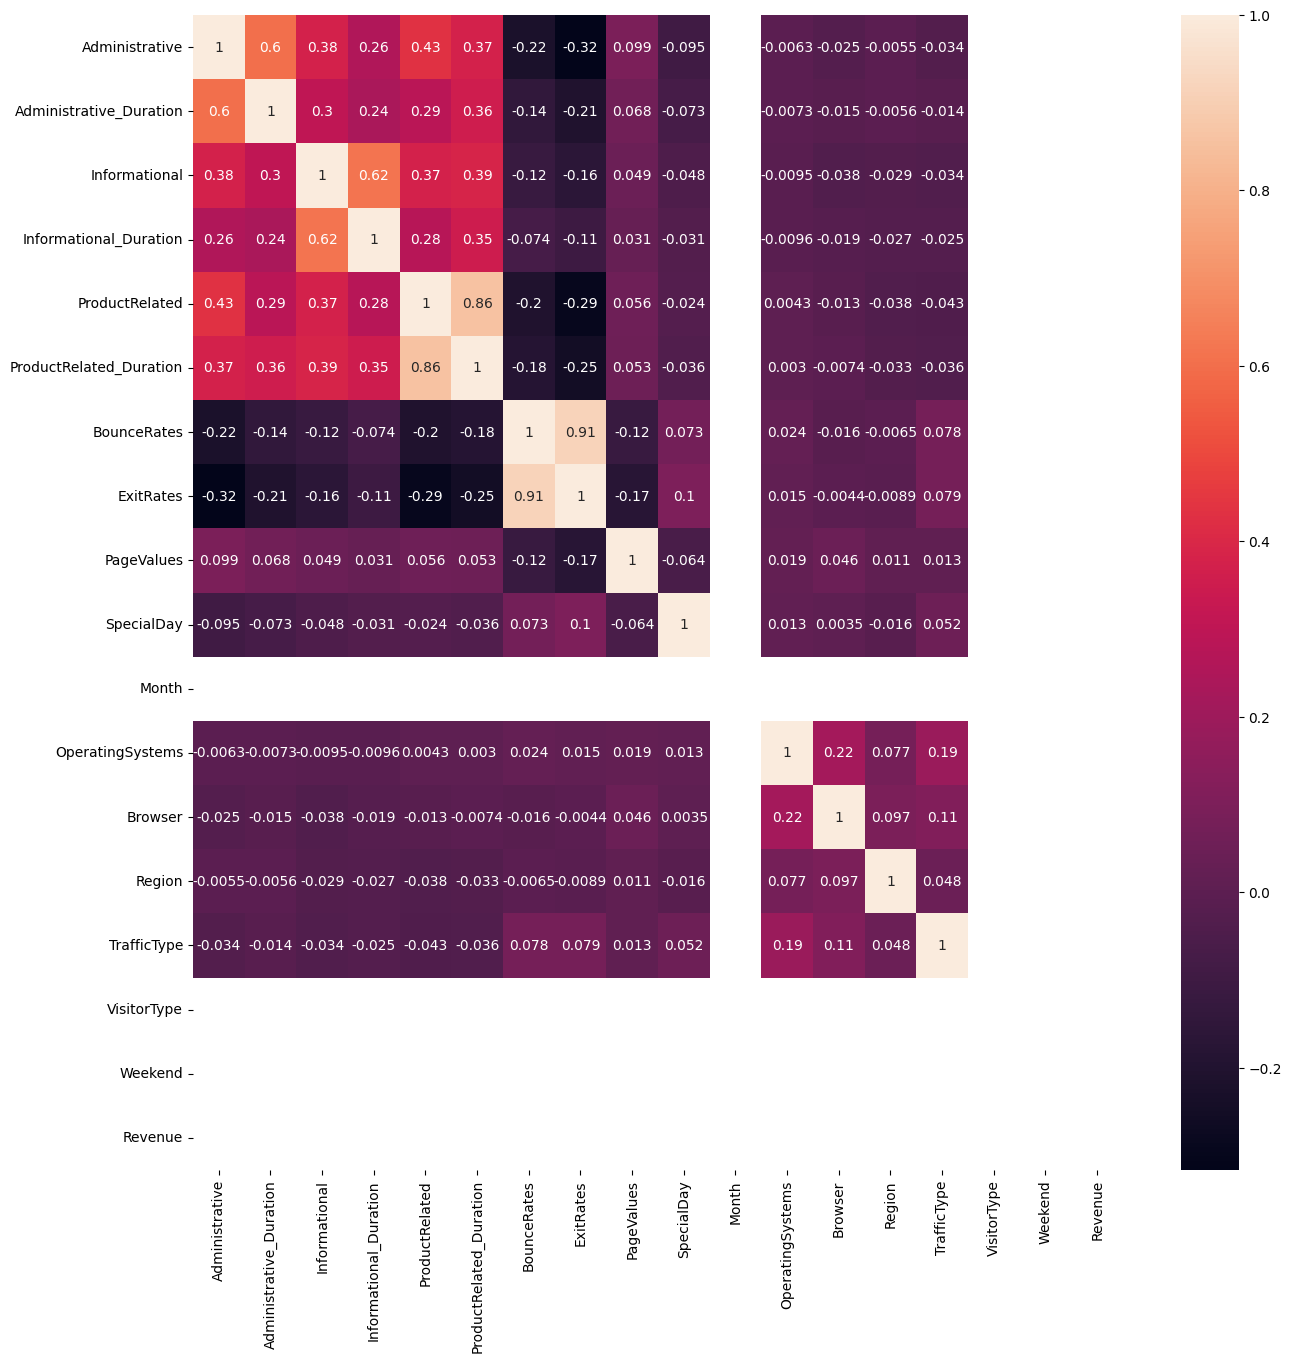

In [ ]:
Month={'Feb':2, 'Mar':3, 'May':5, 'Oct':10, 'June':6, 'Jul':7, 'Aug':8, 'Nov':11, 'Sep':9,'Dec':12}
df['Month']=df['Month'].map(Month)

VisitorType={'Returning_Visitor':3, 'New_Visitor':2, 'Other':1}
df['VisitorType']=df['VisitorType'].map(VisitorType)
d={True:1,False:0}
df['Weekend']=df['Weekend'].map(d)
df['Revenue']=df['Revenue'].map(d)

Var_Corr = df.corr()
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True)

Hasil dari kode ini adalah visualisasi heatmap yang menunjukkan hubungan antara berbagai fitur dalam dataframe df.

Nilai korelasi berkisar antara -1 hingga 1, di mana:
1 menunjukkan hubungan positif sempurna,
-1 menunjukkan hubungan negatif sempurna,
0 menunjukkan tidak ada hubungan.
Visualisasi ini membantu dalam memahami bagaimana fitur-fitur dalam dataset saling berhubungan, yang dapat menjadi sangat berguna dalam analisis data dan pemodelan.

Jumlah nilai NaN di setiap kolom:
Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64
Data setelah scaling:
   Administrative  Administrative_Duration  Informational  \
0       -0.696993                -0.457191      -0.396478   
1       -0.696993                -0.457191      -0.396478   
2       -0.696993                -0.457191      -0.396478   
3       -0.696993                -0.457191      -0.396478   
4       -0.696993                -0.457191      -0.396478   

   Informational_Duration  ProductRelated 

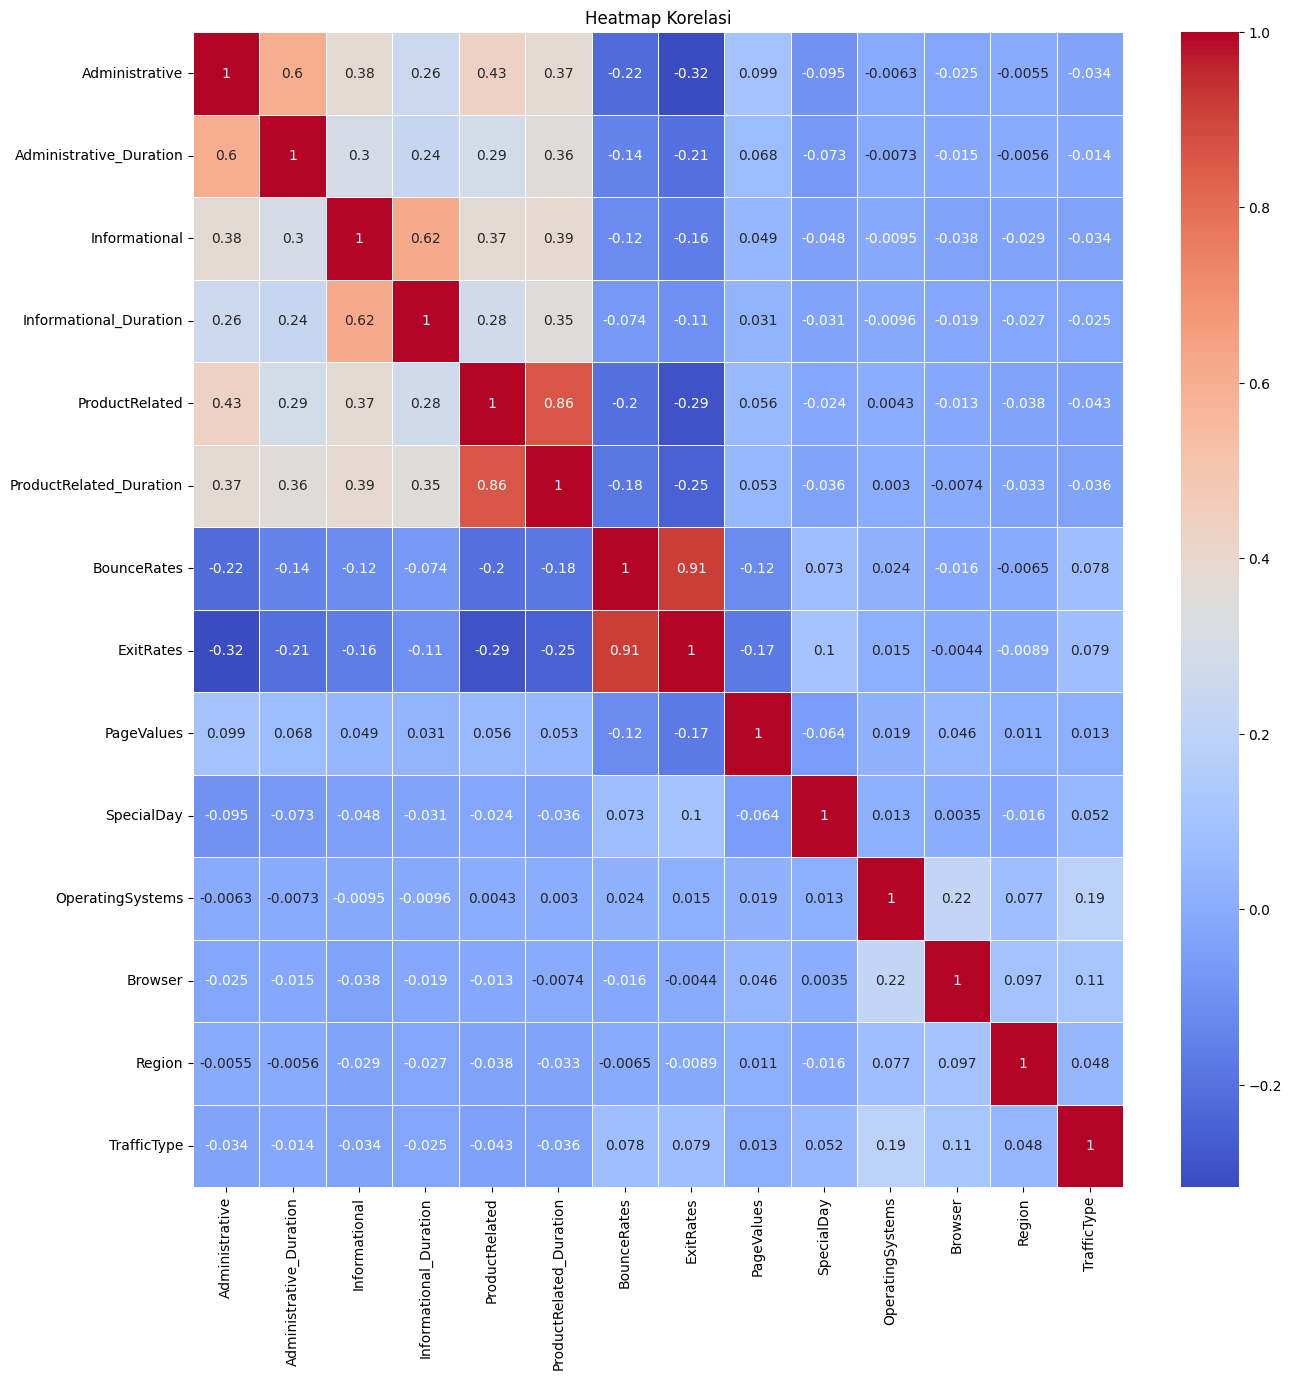

In [ ]:
import pandas as pd  # Mengimpor library pandas untuk bekerja dengan DataFrame
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Langkah 0: Memuat dataset
df = pd.read_csv('/content/sample_data/online_shoppers_intention.csv')  # Ganti dengan path yang benar jika diperlukan

# Langkah 1: Memeriksa apakah ada nilai NaN di dataset
print("Jumlah nilai NaN di setiap kolom:")
print(df.isnull().sum())  # Menampilkan jumlah nilai NaN per kolom

# Langkah 2: Mengisi nilai NaN pada kolom numerik saja
# Pilih kolom numerik
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Mengisi NaN hanya di kolom numerik
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())

# Langkah 3: Inisialisasi dan penerapan StandardScaler pada kolom numerik
scaler = StandardScaler()

# Fit dan transform data pada kolom numerik
scaled_features = scaler.fit_transform(df[numerical_columns])

# Menyimpan hasil scaling ke dalam DataFrame baru
df_feat = pd.DataFrame(scaled_features, columns=numerical_columns)

# Menampilkan beberapa baris pertama dari DataFrame yang telah di-scale
print("Data setelah scaling:")
print(df_feat.head())

# Langkah 4: Menghitung korelasi hanya untuk kolom numerik
# Mengabaikan kolom non-numerik sebelum menghitung korelasi
Var_Corr = df[numerical_columns].corr()

# Visualisasi Korelasi Menggunakan Heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(Var_Corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap Korelasi')
plt.show()


Hasil dari kode ini adalah dataframe df_feat yang berisi fitur-fitur dari dataset yang telah distandarisasi. Data ini siap untuk digunakan dalam pelatihan model machine learning, karena standardisasi membantu dalam menghindari masalah yang mungkin timbul dari skala fitur yang berbeda.

Kode di atas memuat dataset, memeriksa nilai yang hilang (NaN), melakukan standardisasi data numerik, dan kemudian menghitung serta memvisualisasikan korelasi antar variabel numerik dalam bentuk heatmap.

Pengujian menggunakan landasan data-science:

**1. Exploratory Data Analysis (EDA)**

[False  True]


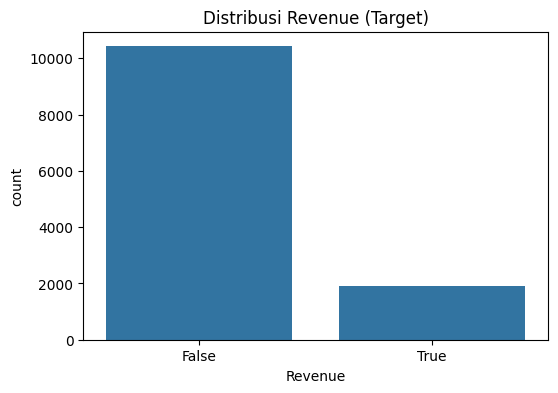

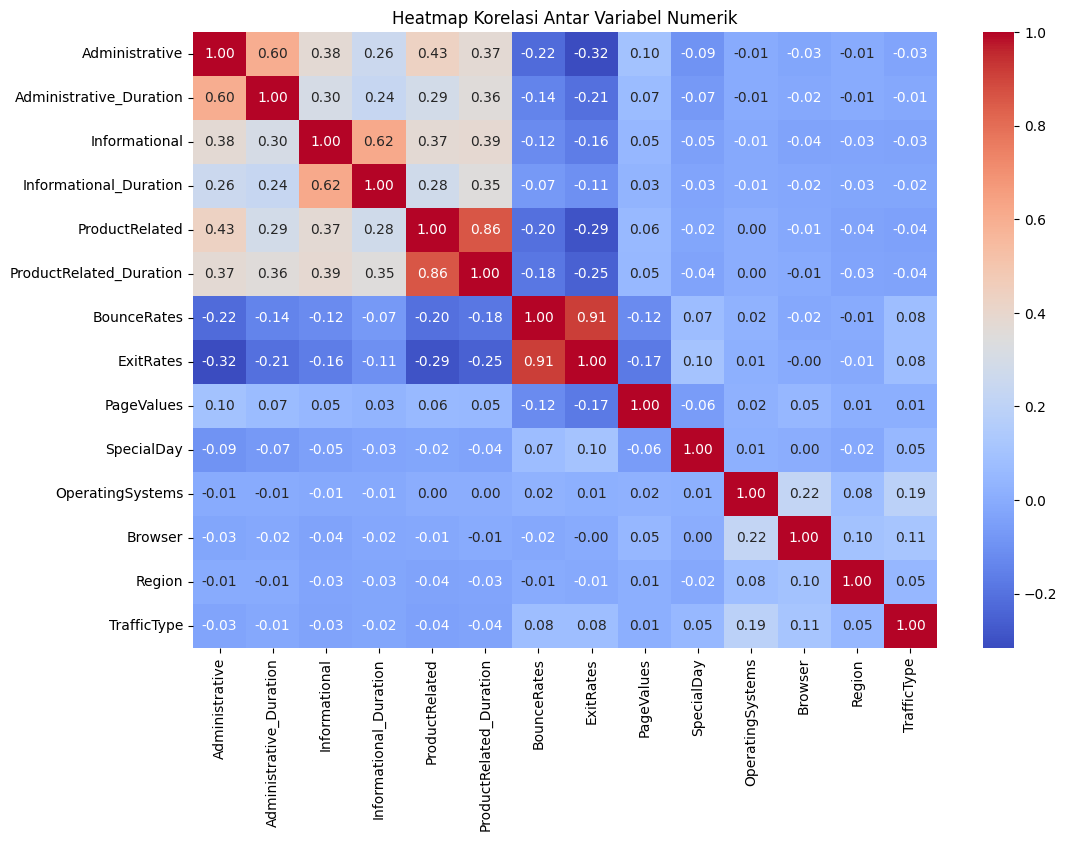

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Langkah 1: Periksa apakah kolom 'Revenue' hanya berisi nilai boolean (True/False)
print(df['Revenue'].unique())  # Cek nilai unik dari kolom 'Revenue'

# Plot distribusi dari Revenue (Target)
plt.figure(figsize=(6, 4))
sns.countplot(x='Revenue', data=df)
plt.title('Distribusi Revenue (Target)')
plt.show()

# Langkah 2: Pilih hanya kolom numerik
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Langkah 3: Visualisasikan heatmap korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(df_numeric.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Heatmap Korelasi Antar Variabel Numerik')
plt.show()


Distribusi dari kolom Revenue penting untuk diketahui karena ini adalah target (label) yang akan diprediksi oleh model machine learning. Jika distribusi terlalu tidak seimbang (misalnya lebih banyak nilai False daripada True), bisa jadi masalah yang dikenal sebagai class imbalance. Ketidakseimbangan ini dapat mempengaruhi performa model prediksi karena model bisa cenderung "mengabaikan" kelas yang lebih jarang muncul.

**2. Preprocessing (Encoding & Normalization)**

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Encode kolom kategorikal
le = LabelEncoder()
df['Month'] = le.fit_transform(df['Month'])
df['VisitorType'] = le.fit_transform(df['VisitorType'])

# Split data ke dalam X (fitur) dan y (target)
X = df.drop('Revenue', axis=1)
y = df['Revenue']

# Normalisasi fitur numerik
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset menjadi data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


Data diubah menjadi bentuk yang bisa digunakan untuk model machine learning: kolom kategorikal dienkode, fitur dinormalisasi, dan data dibagi menjadi set pelatihan dan pengujian.
Tujuan akhirnya adalah menyiapkan dataset dalam bentuk yang optimal agar model bisa mempelajari pola dengan baik dan menghasilkan prediksi yang akurat.

**3. Membangun Model Machine Learning (Classification)**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Inisialisasi model Random Forest
model = RandomForestClassifier(random_state=42)

# Melatih model
model.fit(X_train, y_train)

# Prediksi menggunakan data uji
y_pred = model.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:")
print(report)

Accuracy: 89.70%
Classification Report:
              precision    recall  f1-score   support

       False       0.92      0.96      0.94      3124
        True       0.72      0.56      0.63       575

    accuracy                           0.90      3699
   macro avg       0.82      0.76      0.78      3699
weighted avg       0.89      0.90      0.89      3699



Model Random Forest dilatih dengan data pelatihan untuk memprediksi apakah kunjungan menghasilkan pendapatan.
Setelah dilatih, model dipakai untuk memprediksi hasil pada data uji, dan hasilnya dievaluasi menggunakan akurasi dan laporan klasifikasi.
Evaluasi ini memberikan informasi tentang seberapa baik model memprediksi berbagai skenario (menghasilkan pendapatan atau tidak).

**4. Hasil model aktual**

Akurasi: 0.9000
Precision: 0.7324
Recall: 0.5617
F1-Score: 0.6358


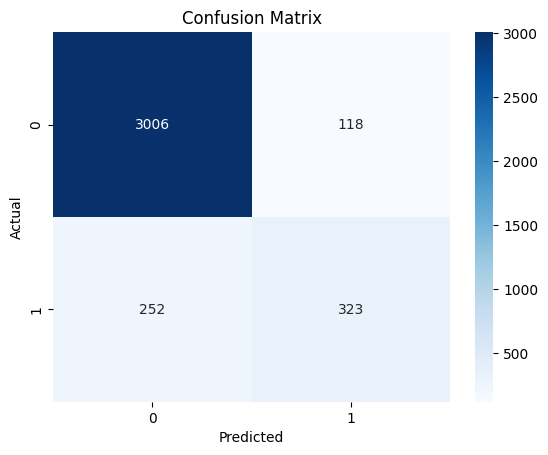

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  # Contoh model, bisa diganti dengan model lain

# Misalkan X adalah fitur dan y adalah label (target/Revenue)
X = df.drop('Revenue', axis=1)
y = df['Revenue']

# Memisahkan data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Inisialisasi model RandomForest (bisa diganti dengan model lain)
model = RandomForestClassifier()

# Latih model dengan data latih
model.fit(X_train, y_train)

# Prediksi hasil pada data uji
y_pred = model.predict(X_test)

# Menghitung Akurasi
accuracy = accuracy_score(y_test, y_pred)

# Menghitung Precision
precision = precision_score(y_test, y_pred)

# Menghitung Recall
recall = recall_score(y_test, y_pred)

# Menghitung F1-Score
f1 = f1_score(y_test, y_pred)

# Menampilkan hasil
print(f"Akurasi: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Membuat confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualisasikan confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Confusion matrix dan metrik-metrik lainnya (accuracy, precision, recall, f1-score) membantu mengevaluasi performa model dengan memberikan informasi detail mengenai jumlah prediksi benar dan salah, serta seberapa baik model memprediksi kelas positif dan negatif.
Visualisasi menggunakan heatmap memudahkan interpretasi confusion matrix dan memberikan gambaran yang lebih intuitif tentang kinerja model.

KNN

In [ ]:
!pip install scikit-plot
!pip install seaborn scikit-learn matplotlib

**K Nearest Neighbor**

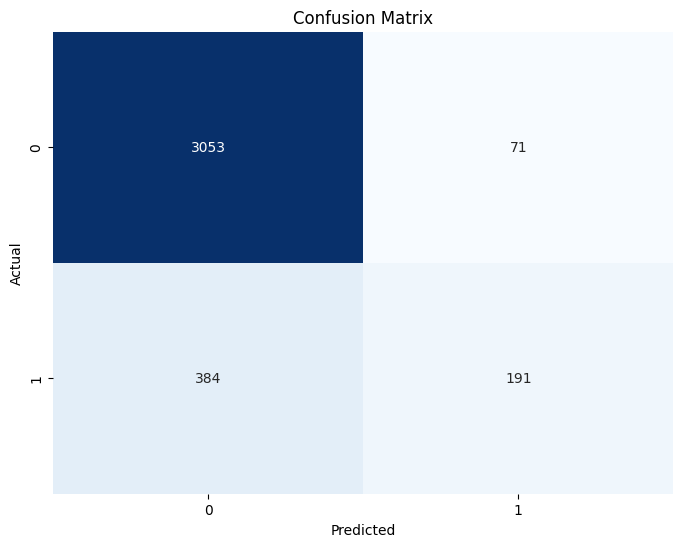

              precision    recall  f1-score   support

       False       0.89      0.98      0.93      3124
        True       0.73      0.33      0.46       575

    accuracy                           0.88      3699
   macro avg       0.81      0.65      0.69      3699
weighted avg       0.86      0.88      0.86      3699



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Mengambil fitur dan target
X = scaled_features  # Pastikan ini adalah fitur yang telah dinormalisasi
y = df['Revenue']  # Target yang ingin diprediksi

# Membagi dataset menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Melatih model KNN
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train, y_train)

# Membuat prediksi
pred = knn.predict(X_test)  # Ini adalah langkah penting untuk mendefinisikan 'pred'

# Confusion matrix
conf_matrix = confusion_matrix(y_test, pred)

# Plotting confusion matrix dengan seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print(classification_report(y_test, pred))

Confusion matrix dan classification report memberikan informasi yang lebih mendalam tentang performa model KNN, tidak hanya berdasarkan akurasi, tetapi juga precision, recall, dan F1-score, yang memberikan gambaran lebih lengkap dalam kasus ketidakseimbangan kelas.
Visualisasi menggunakan heatmap memudahkan identifikasi kesalahan prediksi.

**ROC curve**

No Skill: ROC AUC=0.500
KNN: ROC AUC=0.841


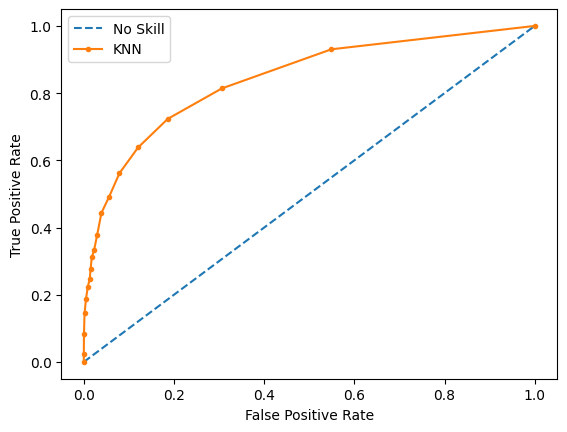

In [ ]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

ns_probs = [0 for _ in range(len(y_test))]
lr_probs = knn.predict_proba(X_test)
lr_probs = lr_probs[:, 1]
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('KNN: ROC AUC=%.3f' % (lr_auc))
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='KNN')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

ROC curve membantu mengevaluasi performa model klasifikasi dengan melihat keseimbangan antara true positive dan false positive pada berbagai threshold. ROC AUC score memberikan angka yang mewakili performa keseluruhan model. Semakin besar nilai AUC, semakin baik model dalam memprediksi kelas secara benar.

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve
y_pred1 = (knn.predict_proba(X_test)[:,1] >= 0.15).astype(int) # set threshold as 0.3
recall_score(y_test, y_pred1)

0.7234782608695652

Kode ini menyesuaikan threshold prediksi menjadi 0.15 untuk meningkatkan Recall model.
Recall dihitung untuk mengevaluasi berapa banyak contoh positif yang benar-benar terdeteksi oleh model dengan threshold tersebut.

In [ ]:
!pip install --upgrade scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 MB 13.3 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires scipy<1.14.0,>=1.7.0, but you have scipy 1.14.1 which is incompatible.


In [ ]:
!pip uninstall scipy -y
!pip install scipy


Found existing installation: scipy 1.14.1
Uninstalling scipy-1.14.1:
  Successfully uninstalled scipy-1.14.1
  Using cached scipy-1.14.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
Using cached scipy-1.14.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (41.2 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires scipy<1.14.0,>=1.7.0, but you have scipy 1.14.1 which is incompatible.


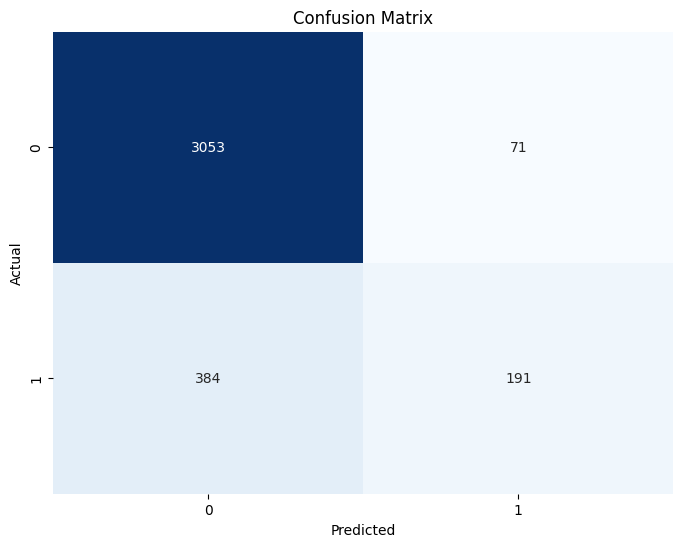

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix
conf_matrix = confusion_matrix(y_test, pred)

# Plot confusion matrix dengan seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Confusion matrix membantu dalam mengevaluasi kinerja model klasifikasi dengan memberikan informasi tentang:

Akurasi: Berapa banyak prediksi yang benar.
Precision: Seberapa tepat model dalam prediksi positif.
Recall: Seberapa baik model dalam mendeteksi kelas positif.

Visualisasi dengan heatmap memudahkan untuk melihat distribusi prediksi dan kesalahan dari model.

In [ ]:
pip install scikit-plot

In [ ]:
pip install scipy==1.7.3


In [ ]:
import numpy as np
print(np.__version__)


1.22.4


In [ ]:

pip install --upgrade scipy


In [ ]:

df = pd.read_csv('/content/sample_data/online_shoppers_intention.csv')  # Ganti dengan path file kamu
print(df.head())  # Menampilkan beberapa baris pertama dari DataFrame


   Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb   

In [ ]:
from google.colab import files
uploaded = files.upload()  # Akan memunculkan dialog untuk mengupload file


Saving online_shoppers_intention.csv to online_shoppers_intention.csv


In [ ]:
import os
print(os.listdir())  # Menampilkan semua file di direktori saat ini


['.config', 'sample_data', 'online_shoppers_intention.csv']


Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object
Encoding Month...
Encoding VisitorType...


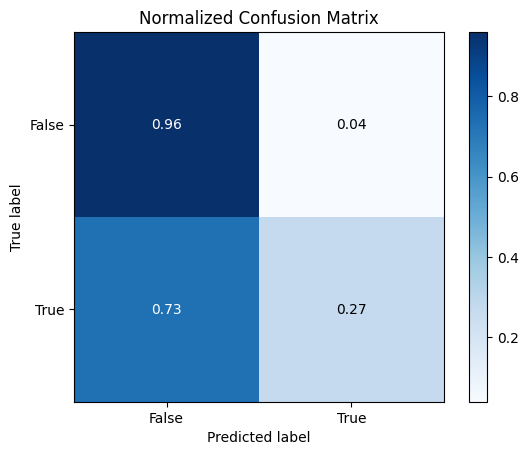

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import scikitplot as skplt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Memuat data
df = pd.read_csv('online_shoppers_intention.csv')  # Ganti dengan path file kamu jika perlu

# Memeriksa tipe data setiap kolom untuk memastikan kategorikal kolom diubah
print(df.dtypes)

# Mengambil fitur dan target
X = df.drop('Revenue', axis=1)  # Pastikan kolom 'Revenue' ada di df
y = df['Revenue']

# ----> Mengubah fitur kategorikal menjadi numerik menggunakan Label Encoding
for column in X.select_dtypes(include=['object']).columns:
    print(f"Encoding {column}...")  # Menunjukkan kolom yang sedang di-encode
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
# <----

# Memisahkan data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Melatih model KNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Membuat prediksi
y_pred1 = knn.predict(X_test)

# Visualisasi confusion matrix
plt_2 = skplt.metrics.plot_confusion_matrix(y_test, y_pred1, normalize=True)
plt.title('Normalized Confusion Matrix')
plt.show()


Kode ini mempersiapkan lingkungan pemrograman yang dibutuhkan untuk melakukan klasifikasi menggunakan algoritma K-Nearest Neighbors (KNN), dengan memisahkan data latih dan uji, mengkonversi data kategorikal ke bentuk numerik, dan menampilkan hasil evaluasi model (seperti confusion matrix) dalam bentuk visual.